In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sims import *
import seaborn as sns

%matplotlib inline

In [2]:
acc_df = pd.DataFrame({'Accuracy (mean)': {'F-Train': 0.7518000000000002, 
                                          'FairBatch': 0.7373999999999999,
                                           'Bias Correcting': 0.7147,
                                           'Unconstrained': 0.8706,
                                           'Local Fairness Constraints': 0.6790000000000002,
                                           'Threshold Adjusting': 0.6461000000000001,
                                           'Adversarial Learning': 0.6436,
                                           'One-sided Fairness Constraint': 0.5865000000000001
                                          }, 
                       'Accuracy (std)': {'F-Train': 0.07113901882933162,
                                         'FairBatch': 0.05084525543253766,
                                          'Bias Correcting': 0.048009478230866036,
                                          'Unconstrained': 0.033100453169103296,
                                          'Local Fairness Constraints': 0.11477369036499611,
                                          'Threshold Adjusting': 0.07593279923722028,
                                          'Adversarial Learning': 0.1277459979803673,
                                          'One-sided Fairness Constraint': 0.06153657449029804
                                         },
                       'DP Disparity (mean)': {'F-Train': 0.10517405982894137,
                                              'FairBatch': 0.07089944477793304,
                                               'Bias Correcting': 0.05370425461665438,
                                               'Unconstrained': 0.3962238054827229,
                                               'Local Fairness Constraints': 0.12097919176661588,
                                               'Threshold Adjusting': 0.06283753340121134,
                                               'Adversarial Learning': 0.0998669879872822,
                                               'One-sided Fairness Constraint': 0.0674577957219746
                                              },
                       'DP Disparity (std)': {'F-Train': 0.07521422122878507,
                                             'FairBatch': 0.04716708105038009,
                                              'Bias Correcting': 0.035635263750367505, 
                                              'Unconstrained': 0.052275978045502144,
                                              'Local Fairness Constraints': 0.14893002536269048,
                                              'Threshold Adjusting': 0.06710760691729953,
                                              'Adversarial Learning': 0.08882041957469501,
                                              'One-sided Fairness Constraint': 0.052285178932533594
                                             }
                      })

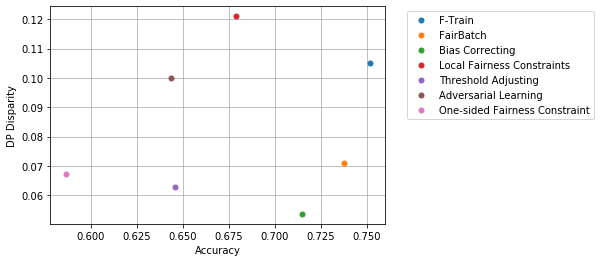

In [114]:
methods = acc_df.index.tolist()
methods.remove('Unconstrained')
fig, ax = plt.subplots()
for method in methods:
    ax.plot(acc_df['Accuracy (mean)'][method], acc_df['DP Disparity (mean)'][method], 
            marker='o', linestyle='', ms=5, label = method)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
# plt.tight_layout()
ax.set_ylabel('DP Disparity')
ax.set_xlabel('Accuracy')
ax.grid()

plt.show()

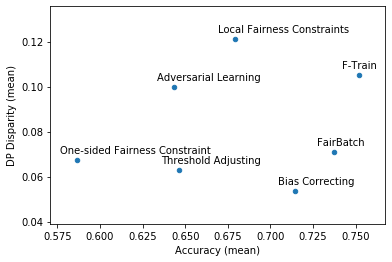

In [56]:
methods = acc_df.index.tolist()
methods.remove('Unconstrained')

acc_df1 = acc_df.drop(labels = ['Unconstrained'])
ax = acc_df1.plot.scatter(x = 'Accuracy (mean)', y = 'DP Disparity (mean)')
for i, method in enumerate(methods):
    ax.annotate(method, (acc_df1['Accuracy (mean)'][method]-0.01, acc_df1['DP Disparity (mean)'][method]+0.003))
None 

In [17]:
acc_l, dp_l = [], []
for alpha in range(10):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 500, test_samples = 100, learning_rate = 0.005, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "bias correcting", alpha = alpha, epsilon = None, optimizer = 'adam')
    acc_l.append(acc)
    dp_l.append(dp)

|  Simulation : 1 | 
      seed : 192 -----


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


      Accuracy: 84.00%  Demographic disparity: 0.49
|  Simulation : 2 | 
      seed : 198 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 92.00%  Demographic disparity: 0.38
|  Simulation : 3 | 
      seed : 203 -----


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


      Accuracy: 82.00%  Demographic disparity: 0.35
|  Simulation : 4 | 
      seed : 208 -----


100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 5 | 
      seed : 213 -----


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 6 | 
      seed : 218 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 90.00%  Demographic disparity: 0.50
|  Simulation : 7 | 
      seed : 224 -----


100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


      Accuracy: 83.00%  Demographic disparity: 0.42
|  Simulation : 8 | 
      seed : 229 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 9 | 
      seed : 234 -----


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


      Accuracy: 88.00%  Demographic disparity: 0.43
|  Simulation : 10 | 
      seed : 239 -----


100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


      Accuracy: 86.00%  Demographic disparity: 0.47
|  Simulation : 11 | 
      seed : 244 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 82.00%  Demographic disparity: 0.39
|  Simulation : 12 | 
      seed : 249 -----


100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


      Accuracy: 92.00%  Demographic disparity: 0.37
|  Simulation : 13 | 
      seed : 254 -----


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 14 | 
      seed : 260 -----


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 15 | 
      seed : 265 -----


100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


      Accuracy: 85.00%  Demographic disparity: 0.31
|  Simulation : 16 | 
      seed : 270 -----


100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 276 -----


100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


      Accuracy: 89.00%  Demographic disparity: 0.46
|  Simulation : 18 | 
      seed : 281 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 86.00%  Demographic disparity: 0.42
|  Simulation : 19 | 
      seed : 285 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 90.00%  Demographic disparity: 0.47
|  Simulation : 20 | 
      seed : 290 -----


100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


      Accuracy: 91.00%  Demographic disparity: 0.35
| Test Accuracy: 0.871(0.031) | Demographic disparity: 0.406(0.053) |
| Time elapsed: 103.04 seconds |
|  Simulation : 1 | 
      seed : 295 -----


100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


      Accuracy: 93.00%  Demographic disparity: 0.43
|  Simulation : 2 | 
      seed : 301 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 91.00%  Demographic disparity: 0.36
|  Simulation : 3 | 
      seed : 306 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 4 | 
      seed : 310 -----


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


      Accuracy: 86.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 316 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 6 | 
      seed : 320 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 88.00%  Demographic disparity: 0.45
|  Simulation : 7 | 
      seed : 325 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 8 | 
      seed : 329 -----


100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


      Accuracy: 89.00%  Demographic disparity: 0.35
|  Simulation : 9 | 
      seed : 334 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 88.00%  Demographic disparity: 0.29
|  Simulation : 10 | 
      seed : 339 -----


100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


      Accuracy: 92.00%  Demographic disparity: 0.35
|  Simulation : 11 | 
      seed : 344 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 12 | 
      seed : 349 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 83.00%  Demographic disparity: 0.38
|  Simulation : 13 | 
      seed : 354 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 14 | 
      seed : 359 -----


100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


      Accuracy: 90.00%  Demographic disparity: 0.29
|  Simulation : 15 | 
      seed : 364 -----


100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


      Accuracy: 88.00%  Demographic disparity: 0.32
|  Simulation : 16 | 
      seed : 369 -----


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


      Accuracy: 79.00%  Demographic disparity: 0.39
|  Simulation : 17 | 
      seed : 373 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 18 | 
      seed : 378 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 91.00%  Demographic disparity: 0.39
|  Simulation : 19 | 
      seed : 383 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 90.00%  Demographic disparity: 0.38
|  Simulation : 20 | 
      seed : 387 -----


100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
| Test Accuracy: 0.883(0.033) | Demographic disparity: 0.344(0.047) |
| Time elapsed: 96.31 seconds |
|  Simulation : 1 | 
      seed : 392 -----


100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 2 | 
      seed : 396 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 3 | 
      seed : 401 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 91.00%  Demographic disparity: 0.46
|  Simulation : 4 | 
      seed : 405 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 410 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.30
|  Simulation : 6 | 
      seed : 415 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 87.00%  Demographic disparity: 0.31
|  Simulation : 7 | 
      seed : 420 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 84.00%  Demographic disparity: 0.30
|  Simulation : 8 | 
      seed : 424 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 84.00%  Demographic disparity: 0.21
|  Simulation : 9 | 
      seed : 429 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 10 | 
      seed : 433 -----


100%|██████████| 10/10 [00:04<00:00,  2.10it/s]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 11 | 
      seed : 439 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 12 | 
      seed : 443 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 86.00%  Demographic disparity: 0.27
|  Simulation : 13 | 
      seed : 448 -----


100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 14 | 
      seed : 453 -----


100%|██████████| 10/10 [00:04<00:00,  2.32it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 15 | 
      seed : 457 -----


100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


      Accuracy: 84.00%  Demographic disparity: 0.13
|  Simulation : 16 | 
      seed : 462 -----


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 17 | 
      seed : 468 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 91.00%  Demographic disparity: 0.31
|  Simulation : 18 | 
      seed : 472 -----


100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


      Accuracy: 82.00%  Demographic disparity: 0.14
|  Simulation : 19 | 
      seed : 478 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 87.00%  Demographic disparity: 0.24
|  Simulation : 20 | 
      seed : 483 -----


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


      Accuracy: 88.00%  Demographic disparity: 0.31
| Test Accuracy: 0.853(0.038) | Demographic disparity: 0.255(0.092) |
| Time elapsed: 96.70 seconds |
|  Simulation : 1 | 
      seed : 488 -----


100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


      Accuracy: 76.00%  Demographic disparity: 0.16
|  Simulation : 2 | 
      seed : 493 -----


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


      Accuracy: 75.00%  Demographic disparity: 0.14
|  Simulation : 3 | 
      seed : 499 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 4 | 
      seed : 504 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 78.00%  Demographic disparity: 0.24
|  Simulation : 5 | 
      seed : 509 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 81.00%  Demographic disparity: 0.19
|  Simulation : 6 | 
      seed : 515 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 89.00%  Demographic disparity: 0.27
|  Simulation : 7 | 
      seed : 519 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 83.00%  Demographic disparity: 0.17
|  Simulation : 8 | 
      seed : 524 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 81.00%  Demographic disparity: 0.16
|  Simulation : 9 | 
      seed : 528 -----


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


      Accuracy: 74.00%  Demographic disparity: 0.14
|  Simulation : 10 | 
      seed : 533 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 11 | 
      seed : 538 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 87.00%  Demographic disparity: 0.28
|  Simulation : 12 | 
      seed : 543 -----


100%|██████████| 10/10 [00:04<00:00,  2.02it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 13 | 
      seed : 548 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 86.00%  Demographic disparity: 0.20
|  Simulation : 14 | 
      seed : 553 -----


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 15 | 
      seed : 558 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 87.00%  Demographic disparity: 0.24
|  Simulation : 16 | 
      seed : 563 -----


100%|██████████| 10/10 [00:04<00:00,  2.08it/s]


      Accuracy: 83.00%  Demographic disparity: 0.17
|  Simulation : 17 | 
      seed : 568 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 18 | 
      seed : 573 -----


100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 19 | 
      seed : 579 -----


100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


      Accuracy: 83.00%  Demographic disparity: 0.19
|  Simulation : 20 | 
      seed : 583 -----


100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


      Accuracy: 85.00%  Demographic disparity: 0.23
| Test Accuracy: 0.813(0.042) | Demographic disparity: 0.204(0.046) |
| Time elapsed: 99.70 seconds |
|  Simulation : 1 | 
      seed : 588 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 2 | 
      seed : 593 -----


100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 3 | 
      seed : 598 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 69.00%  Demographic disparity: 0.07
|  Simulation : 4 | 
      seed : 603 -----


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


      Accuracy: 78.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 607 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 6 | 
      seed : 612 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 83.00%  Demographic disparity: 0.27
|  Simulation : 7 | 
      seed : 616 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 82.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 621 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 85.00%  Demographic disparity: 0.18
|  Simulation : 9 | 
      seed : 625 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 82.00%  Demographic disparity: 0.27
|  Simulation : 10 | 
      seed : 630 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 82.00%  Demographic disparity: 0.19
|  Simulation : 11 | 
      seed : 635 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 12 | 
      seed : 639 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 644 -----


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


      Accuracy: 73.00%  Demographic disparity: 0.11
|  Simulation : 14 | 
      seed : 649 -----


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


      Accuracy: 82.00%  Demographic disparity: 0.27
|  Simulation : 15 | 
      seed : 654 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 81.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 658 -----


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


      Accuracy: 72.00%  Demographic disparity: 0.12
|  Simulation : 17 | 
      seed : 663 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 667 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 82.00%  Demographic disparity: 0.15
|  Simulation : 19 | 
      seed : 672 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 76.00%  Demographic disparity: 0.18
|  Simulation : 20 | 
      seed : 676 -----


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


      Accuracy: 71.00%  Demographic disparity: 0.10
| Test Accuracy: 0.796(0.048) | Demographic disparity: 0.185(0.067) |
| Time elapsed: 92.65 seconds |
|  Simulation : 1 | 
      seed : 681 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 71.00%  Demographic disparity: 0.08
|  Simulation : 2 | 
      seed : 685 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 78.00%  Demographic disparity: 0.04
|  Simulation : 3 | 
      seed : 690 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 75.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 694 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.05
|  Simulation : 5 | 
      seed : 699 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.08
|  Simulation : 6 | 
      seed : 703 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 708 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 8 | 
      seed : 712 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 716 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 69.00%  Demographic disparity: 0.09
|  Simulation : 10 | 
      seed : 721 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 725 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.07
|  Simulation : 12 | 
      seed : 730 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.08
|  Simulation : 13 | 
      seed : 734 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 14 | 
      seed : 739 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 743 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 80.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 748 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.19
|  Simulation : 17 | 
      seed : 752 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 85.00%  Demographic disparity: 0.25
|  Simulation : 18 | 
      seed : 757 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 75.00%  Demographic disparity: 0.24
|  Simulation : 19 | 
      seed : 761 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 72.00%  Demographic disparity: 0.13
|  Simulation : 20 | 
      seed : 766 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.20
| Test Accuracy: 0.762(0.050) | Demographic disparity: 0.131(0.063) |
| Time elapsed: 89.34 seconds |
|  Simulation : 1 | 
      seed : 770 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.13
|  Simulation : 2 | 
      seed : 775 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.10
|  Simulation : 3 | 
      seed : 779 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.06
|  Simulation : 4 | 
      seed : 783 -----


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


      Accuracy: 72.00%  Demographic disparity: 0.11
|  Simulation : 5 | 
      seed : 788 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 69.00%  Demographic disparity: 0.05
|  Simulation : 6 | 
      seed : 792 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.14
|  Simulation : 7 | 
      seed : 797 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 8 | 
      seed : 801 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 9 | 
      seed : 806 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 72.00%  Demographic disparity: 0.13
|  Simulation : 10 | 
      seed : 810 -----


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


      Accuracy: 71.00%  Demographic disparity: 0.20
|  Simulation : 11 | 
      seed : 815 -----


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 12 | 
      seed : 820 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 77.00%  Demographic disparity: 0.12
|  Simulation : 13 | 
      seed : 824 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.16
|  Simulation : 14 | 
      seed : 829 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 79.00%  Demographic disparity: 0.10
|  Simulation : 15 | 
      seed : 833 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 66.00%  Demographic disparity: 0.01
|  Simulation : 16 | 
      seed : 838 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.10
|  Simulation : 17 | 
      seed : 842 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 59.00%  Demographic disparity: 0.07
|  Simulation : 18 | 
      seed : 847 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 70.00%  Demographic disparity: 0.07
|  Simulation : 19 | 
      seed : 851 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 20 | 
      seed : 856 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 72.00%  Demographic disparity: 0.11
| Test Accuracy: 0.725(0.051) | Demographic disparity: 0.101(0.046) |
| Time elapsed: 89.87 seconds |
|  Simulation : 1 | 
      seed : 860 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 81.00%  Demographic disparity: 0.11
|  Simulation : 2 | 
      seed : 864 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.02
|  Simulation : 3 | 
      seed : 869 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 79.00%  Demographic disparity: 0.07
|  Simulation : 4 | 
      seed : 873 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 878 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 74.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 882 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 79.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 887 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 76.00%  Demographic disparity: 0.23
|  Simulation : 8 | 
      seed : 891 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 66.00%  Demographic disparity: 0.00
|  Simulation : 9 | 
      seed : 896 -----


100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 10 | 
      seed : 900 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 69.00%  Demographic disparity: 0.01
|  Simulation : 11 | 
      seed : 910 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 67.00%  Demographic disparity: 0.03
|  Simulation : 12 | 
      seed : 919 -----


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


      Accuracy: 78.00%  Demographic disparity: 0.09
|  Simulation : 13 | 
      seed : 924 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 77.00%  Demographic disparity: 0.27
|  Simulation : 14 | 
      seed : 937 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 65.00%  Demographic disparity: 0.15
|  Simulation : 15 | 
      seed : 944 -----


100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


      Accuracy: 77.00%  Demographic disparity: 0.10
|  Simulation : 16 | 
      seed : 950 -----


100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


      Accuracy: 73.00%  Demographic disparity: 0.08
|  Simulation : 17 | 
      seed : 956 -----


100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


      Accuracy: 77.00%  Demographic disparity: 0.13
|  Simulation : 18 | 
      seed : 961 -----


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


      Accuracy: 78.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 968 -----


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


      Accuracy: 72.00%  Demographic disparity: 0.07
|  Simulation : 20 | 
      seed : 973 -----


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


      Accuracy: 69.00%  Demographic disparity: 0.07
| Test Accuracy: 0.733(0.049) | Demographic disparity: 0.084(0.068) |
| Time elapsed: 119.19 seconds |
|  Simulation : 1 | 
      seed : 979 -----


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


      Accuracy: 70.00%  Demographic disparity: 0.09
|  Simulation : 2 | 
      seed : 986 -----


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


      Accuracy: 81.00%  Demographic disparity: 0.16
|  Simulation : 3 | 
      seed : 992 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 84.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 997 -----


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


      Accuracy: 67.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 3 -----


100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


      Accuracy: 61.00%  Demographic disparity: 0.10
|  Simulation : 6 | 
      seed : 8 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 76.00%  Demographic disparity: 0.19
|  Simulation : 7 | 
      seed : 13 -----


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


      Accuracy: 69.00%  Demographic disparity: 0.12
|  Simulation : 8 | 
      seed : 19 -----


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


      Accuracy: 67.00%  Demographic disparity: 0.07
|  Simulation : 9 | 
      seed : 24 -----


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


      Accuracy: 67.00%  Demographic disparity: 0.01
|  Simulation : 10 | 
      seed : 30 -----


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]


      Accuracy: 72.00%  Demographic disparity: 0.05
|  Simulation : 11 | 
      seed : 35 -----


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


      Accuracy: 69.00%  Demographic disparity: 0.02
|  Simulation : 12 | 
      seed : 41 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 68.00%  Demographic disparity: 0.03
|  Simulation : 13 | 
      seed : 46 -----


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]


      Accuracy: 74.00%  Demographic disparity: 0.03
|  Simulation : 14 | 
      seed : 52 -----


100%|██████████| 10/10 [00:05<00:00,  2.00it/s]


      Accuracy: 68.00%  Demographic disparity: 0.06
|  Simulation : 15 | 
      seed : 57 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 16 | 
      seed : 63 -----


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


      Accuracy: 70.00%  Demographic disparity: 0.07
|  Simulation : 17 | 
      seed : 68 -----


100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


      Accuracy: 68.00%  Demographic disparity: 0.09
|  Simulation : 18 | 
      seed : 74 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 69.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 79 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 73.00%  Demographic disparity: 0.06
|  Simulation : 20 | 
      seed : 87 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
| Test Accuracy: 0.711(0.052) | Demographic disparity: 0.076(0.053) |
| Time elapsed: 117.65 seconds |
|  Simulation : 1 | 
      seed : 97 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 107 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 65.00%  Demographic disparity: 0.07
|  Simulation : 3 | 
      seed : 116 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 69.00%  Demographic disparity: 0.01
|  Simulation : 4 | 
      seed : 126 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 75.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 135 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 66.00%  Demographic disparity: 0.03
|  Simulation : 6 | 
      seed : 144 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 63.00%  Demographic disparity: 0.09
|  Simulation : 7 | 
      seed : 153 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 70.00%  Demographic disparity: 0.04
|  Simulation : 8 | 
      seed : 162 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 66.00%  Demographic disparity: 0.04
|  Simulation : 9 | 
      seed : 171 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 67.00%  Demographic disparity: 0.04
|  Simulation : 10 | 
      seed : 181 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 63.00%  Demographic disparity: 0.01
|  Simulation : 11 | 
      seed : 190 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 65.00%  Demographic disparity: 0.03
|  Simulation : 12 | 
      seed : 200 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 76.00%  Demographic disparity: 0.03
|  Simulation : 13 | 
      seed : 209 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 14 | 
      seed : 219 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 70.00%  Demographic disparity: 0.01
|  Simulation : 15 | 
      seed : 228 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 60.00%  Demographic disparity: 0.06
|  Simulation : 16 | 
      seed : 237 -----


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


      Accuracy: 67.00%  Demographic disparity: 0.01
|  Simulation : 17 | 
      seed : 243 -----


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


      Accuracy: 68.00%  Demographic disparity: 0.01
|  Simulation : 18 | 
      seed : 249 -----


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


      Accuracy: 75.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 255 -----


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


      Accuracy: 62.00%  Demographic disparity: 0.05
|  Simulation : 20 | 
      seed : 260 -----


100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

      Accuracy: 81.00%  Demographic disparity: 0.12
| Test Accuracy: 0.692(0.064) | Demographic disparity: 0.055(0.059) |
| Time elapsed: 169.66 seconds |


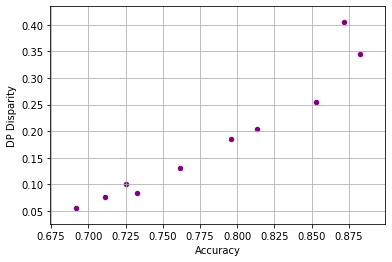

In [30]:
bc_df = pd.DataFrame({
    'Accuracy': acc_l,
    'DP Disparity': dp_l
}) 
ax = bc_df.plot.scatter(x = 'Accuracy', y = 'DP Disparity', c = 'purple')
# bc_df.plot.line(x = 'Accuracy', y = 'DP Disparity', c = 'pink', ax = ax)
ax.grid()
None

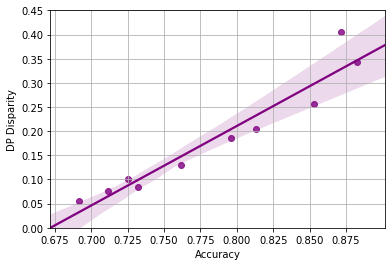

In [61]:
ax = sns.regplot(bc_df['Accuracy'], bc_df['DP Disparity'], color = 'purple')
ax.grid()
ax.set_xticks(np.arange(0.675, 0.9, 0.025))
ax.set_yticks(np.arange(0, 0.5, 0.05))
ax.set_ylim(0, 0.45)
None 

In [79]:
acc_l, dp_l = [], []
for alpha in np.arange(0., 0.2, 0.02):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.005, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "FairBatch", alpha = alpha, epsilon = None, optimizer = 'adam',
                                     adaptive_alpha = False)
    acc_l.append(acc)
    dp_l.append(dp)

|  Simulation : 1 | 
      seed : 546 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 91.00%  Demographic disparity: 0.52
|  Simulation : 2 | 
      seed : 557 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 84.00%  Demographic disparity: 0.40
|  Simulation : 3 | 
      seed : 565 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 4 | 
      seed : 573 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 87.00%  Demographic disparity: 0.49
|  Simulation : 5 | 
      seed : 581 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 89.00%  Demographic disparity: 0.40
|  Simulation : 6 | 
      seed : 589 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 82.00%  Demographic disparity: 0.32
|  Simulation : 7 | 
      seed : 597 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 81.00%  Demographic disparity: 0.52
|  Simulation : 8 | 
      seed : 605 -----


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 9 | 
      seed : 612 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 10 | 
      seed : 619 -----


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


      Accuracy: 84.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 626 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 12 | 
      seed : 633 -----


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


      Accuracy: 93.00%  Demographic disparity: 0.44
|  Simulation : 13 | 
      seed : 640 -----


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 14 | 
      seed : 646 -----


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 15 | 
      seed : 653 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 83.00%  Demographic disparity: 0.45
|  Simulation : 16 | 
      seed : 659 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 94.00%  Demographic disparity: 0.38
|  Simulation : 17 | 
      seed : 666 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 18 | 
      seed : 673 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 86.00%  Demographic disparity: 0.50
|  Simulation : 19 | 
      seed : 680 -----


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


      Accuracy: 79.00%  Demographic disparity: 0.35
|  Simulation : 20 | 
      seed : 687 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 87.00%  Demographic disparity: 0.34
| Test Accuracy: 0.861(0.041) | Demographic disparity: 0.406(0.063) |
| Time elapsed: 147.77 seconds |
|  Simulation : 1 | 
      seed : 694 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 87.00%  Demographic disparity: 0.25
|  Simulation : 2 | 
      seed : 702 -----


100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 3 | 
      seed : 709 -----


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 716 -----


100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


      Accuracy: 88.00%  Demographic disparity: 0.39
|  Simulation : 5 | 
      seed : 722 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 84.00%  Demographic disparity: 0.32
|  Simulation : 6 | 
      seed : 731 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 7 | 
      seed : 739 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 90.00%  Demographic disparity: 0.30
|  Simulation : 8 | 
      seed : 746 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.35
|  Simulation : 9 | 
      seed : 753 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 10 | 
      seed : 761 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 92.00%  Demographic disparity: 0.29
|  Simulation : 11 | 
      seed : 769 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 12 | 
      seed : 776 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 76.00%  Demographic disparity: 0.33
|  Simulation : 13 | 
      seed : 783 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 14 | 
      seed : 790 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 15 | 
      seed : 797 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 93.00%  Demographic disparity: 0.38
|  Simulation : 16 | 
      seed : 804 -----


100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


      Accuracy: 95.00%  Demographic disparity: 0.40
|  Simulation : 17 | 
      seed : 810 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 18 | 
      seed : 817 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 92.00%  Demographic disparity: 0.37
|  Simulation : 19 | 
      seed : 823 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 20 | 
      seed : 830 -----


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


      Accuracy: 87.00%  Demographic disparity: 0.24
| Test Accuracy: 0.875(0.043) | Demographic disparity: 0.334(0.047) |
| Time elapsed: 142.51 seconds |
|  Simulation : 1 | 
      seed : 837 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 2 | 
      seed : 843 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 87.00%  Demographic disparity: 0.29
|  Simulation : 3 | 
      seed : 850 -----


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 856 -----


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


      Accuracy: 92.00%  Demographic disparity: 0.39
|  Simulation : 5 | 
      seed : 862 -----


100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


      Accuracy: 80.00%  Demographic disparity: 0.26
|  Simulation : 6 | 
      seed : 869 -----


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 7 | 
      seed : 875 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 8 | 
      seed : 884 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 80.00%  Demographic disparity: 0.23
|  Simulation : 9 | 
      seed : 891 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 85.00%  Demographic disparity: 0.40
|  Simulation : 10 | 
      seed : 898 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 11 | 
      seed : 906 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 89.00%  Demographic disparity: 0.41
|  Simulation : 12 | 
      seed : 913 -----


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


      Accuracy: 90.00%  Demographic disparity: 0.27
|  Simulation : 13 | 
      seed : 920 -----


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


      Accuracy: 89.00%  Demographic disparity: 0.32
|  Simulation : 14 | 
      seed : 927 -----


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


      Accuracy: 91.00%  Demographic disparity: 0.34
|  Simulation : 15 | 
      seed : 934 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 16 | 
      seed : 941 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 89.00%  Demographic disparity: 0.22
|  Simulation : 17 | 
      seed : 947 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 84.00%  Demographic disparity: 0.34
|  Simulation : 18 | 
      seed : 957 -----


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 969 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 83.00%  Demographic disparity: 0.27
|  Simulation : 20 | 
      seed : 978 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 86.00%  Demographic disparity: 0.21
| Test Accuracy: 0.864(0.034) | Demographic disparity: 0.311(0.073) |
| Time elapsed: 150.27 seconds |
|  Simulation : 1 | 
      seed : 987 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 89.00%  Demographic disparity: 0.27
|  Simulation : 2 | 
      seed : 996 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 82.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 5 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 84.00%  Demographic disparity: 0.26
|  Simulation : 4 | 
      seed : 13 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 86.00%  Demographic disparity: 0.29
|  Simulation : 5 | 
      seed : 20 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 92.00%  Demographic disparity: 0.44
|  Simulation : 6 | 
      seed : 26 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 7 | 
      seed : 36 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 83.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 43 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 86.00%  Demographic disparity: 0.31
|  Simulation : 9 | 
      seed : 51 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 82.00%  Demographic disparity: 0.30
|  Simulation : 10 | 
      seed : 59 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 90.00%  Demographic disparity: 0.41
|  Simulation : 11 | 
      seed : 67 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 12 | 
      seed : 75 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 82.00%  Demographic disparity: 0.26
|  Simulation : 13 | 
      seed : 82 -----


100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


      Accuracy: 92.00%  Demographic disparity: 0.32
|  Simulation : 14 | 
      seed : 94 -----


100%|██████████| 10/10 [00:13<00:00,  1.30s/it]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 15 | 
      seed : 108 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 16 | 
      seed : 116 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 80.00%  Demographic disparity: 0.26
|  Simulation : 17 | 
      seed : 122 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 82.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 129 -----


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


      Accuracy: 84.00%  Demographic disparity: 0.21
|  Simulation : 19 | 
      seed : 136 -----


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


      Accuracy: 91.00%  Demographic disparity: 0.35
|  Simulation : 20 | 
      seed : 143 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 85.00%  Demographic disparity: 0.29
| Test Accuracy: 0.860(0.037) | Demographic disparity: 0.297(0.070) |
| Time elapsed: 163.51 seconds |
|  Simulation : 1 | 
      seed : 150 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 158 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 78.00%  Demographic disparity: 0.20
|  Simulation : 3 | 
      seed : 166 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 76.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 174 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 87.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 183 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 83.00%  Demographic disparity: 0.25
|  Simulation : 6 | 
      seed : 191 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 83.00%  Demographic disparity: 0.35
|  Simulation : 7 | 
      seed : 199 -----


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
|  Simulation : 8 | 
      seed : 205 -----


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


      Accuracy: 80.00%  Demographic disparity: 0.27
|  Simulation : 9 | 
      seed : 214 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 81.00%  Demographic disparity: 0.23
|  Simulation : 10 | 
      seed : 222 -----


100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


      Accuracy: 86.00%  Demographic disparity: 0.37
|  Simulation : 11 | 
      seed : 232 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 73.00%  Demographic disparity: 0.07
|  Simulation : 12 | 
      seed : 241 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 13 | 
      seed : 251 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 86.00%  Demographic disparity: 0.29
|  Simulation : 14 | 
      seed : 263 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 81.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 276 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 87.00%  Demographic disparity: 0.33
|  Simulation : 16 | 
      seed : 287 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 79.00%  Demographic disparity: 0.31
|  Simulation : 17 | 
      seed : 297 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 88.00%  Demographic disparity: 0.21
|  Simulation : 18 | 
      seed : 305 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 83.00%  Demographic disparity: 0.16
|  Simulation : 19 | 
      seed : 314 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 76.00%  Demographic disparity: 0.08
|  Simulation : 20 | 
      seed : 324 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
| Test Accuracy: 0.819(0.042) | Demographic disparity: 0.233(0.079) |
| Time elapsed: 183.33 seconds |
|  Simulation : 1 | 
      seed : 334 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 78.00%  Demographic disparity: 0.15
|  Simulation : 2 | 
      seed : 342 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 79.00%  Demographic disparity: 0.14
|  Simulation : 3 | 
      seed : 350 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 358 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 84.00%  Demographic disparity: 0.23
|  Simulation : 5 | 
      seed : 365 -----


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


      Accuracy: 87.00%  Demographic disparity: 0.23
|  Simulation : 6 | 
      seed : 373 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 7 | 
      seed : 382 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 8 | 
      seed : 392 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 84.00%  Demographic disparity: 0.26
|  Simulation : 9 | 
      seed : 400 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 408 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 79.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 415 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
|  Simulation : 12 | 
      seed : 423 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 74.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 431 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 82.00%  Demographic disparity: 0.25
|  Simulation : 14 | 
      seed : 440 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 78.00%  Demographic disparity: 0.27
|  Simulation : 15 | 
      seed : 447 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 88.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 456 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 85.00%  Demographic disparity: 0.23
|  Simulation : 17 | 
      seed : 465 -----


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 478 -----


100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


      Accuracy: 74.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 498 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 20 | 
      seed : 507 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 79.00%  Demographic disparity: 0.05
| Test Accuracy: 0.806(0.038) | Demographic disparity: 0.178(0.075) |
| Time elapsed: 183.25 seconds |
|  Simulation : 1 | 
      seed : 517 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 80.00%  Demographic disparity: 0.10
|  Simulation : 2 | 
      seed : 525 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 91.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 533 -----


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


      Accuracy: 77.00%  Demographic disparity: 0.20
|  Simulation : 4 | 
      seed : 540 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 5 | 
      seed : 549 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 78.00%  Demographic disparity: 0.12
|  Simulation : 6 | 
      seed : 559 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 84.00%  Demographic disparity: 0.15
|  Simulation : 7 | 
      seed : 568 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 8 | 
      seed : 577 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 83.00%  Demographic disparity: 0.28
|  Simulation : 9 | 
      seed : 586 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 86.00%  Demographic disparity: 0.24
|  Simulation : 10 | 
      seed : 596 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 84.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 603 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 81.00%  Demographic disparity: 0.11
|  Simulation : 12 | 
      seed : 612 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 83.00%  Demographic disparity: 0.16
|  Simulation : 13 | 
      seed : 622 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 14 | 
      seed : 631 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 81.00%  Demographic disparity: 0.23
|  Simulation : 15 | 
      seed : 641 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 84.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 652 -----


100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


      Accuracy: 91.00%  Demographic disparity: 0.20
|  Simulation : 17 | 
      seed : 665 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 77.00%  Demographic disparity: 0.17
|  Simulation : 18 | 
      seed : 674 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 19 | 
      seed : 685 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
|  Simulation : 20 | 
      seed : 694 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
| Test Accuracy: 0.820(0.053) | Demographic disparity: 0.192(0.070) |
| Time elapsed: 185.41 seconds |
|  Simulation : 1 | 
      seed : 702 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 72.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 713 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 3 | 
      seed : 723 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 78.00%  Demographic disparity: 0.20
|  Simulation : 4 | 
      seed : 731 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 76.00%  Demographic disparity: 0.03
|  Simulation : 5 | 
      seed : 738 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 83.00%  Demographic disparity: 0.38
|  Simulation : 6 | 
      seed : 745 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 84.00%  Demographic disparity: 0.14
|  Simulation : 7 | 
      seed : 753 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 8 | 
      seed : 761 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 89.00%  Demographic disparity: 0.18
|  Simulation : 9 | 
      seed : 769 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 78.00%  Demographic disparity: 0.12
|  Simulation : 10 | 
      seed : 779 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 79.00%  Demographic disparity: 0.21
|  Simulation : 11 | 
      seed : 790 -----


100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 12 | 
      seed : 803 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 13 | 
      seed : 810 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 75.00%  Demographic disparity: 0.05
|  Simulation : 14 | 
      seed : 819 -----


100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


      Accuracy: 80.00%  Demographic disparity: 0.10
|  Simulation : 15 | 
      seed : 829 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 79.00%  Demographic disparity: 0.24
|  Simulation : 16 | 
      seed : 839 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 76.00%  Demographic disparity: 0.11
|  Simulation : 17 | 
      seed : 852 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 79.00%  Demographic disparity: 0.20
|  Simulation : 18 | 
      seed : 863 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 85.00%  Demographic disparity: 0.25
|  Simulation : 19 | 
      seed : 874 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 20 | 
      seed : 883 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 74.00%  Demographic disparity: 0.20
| Test Accuracy: 0.798(0.045) | Demographic disparity: 0.181(0.096) |
| Time elapsed: 187.67 seconds |
|  Simulation : 1 | 
      seed : 890 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 80.00%  Demographic disparity: 0.09
|  Simulation : 2 | 
      seed : 898 -----


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 3 | 
      seed : 905 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 86.00%  Demographic disparity: 0.25
|  Simulation : 4 | 
      seed : 914 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 5 | 
      seed : 923 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 931 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 7 | 
      seed : 939 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 73.00%  Demographic disparity: 0.05
|  Simulation : 8 | 
      seed : 946 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 9 | 
      seed : 954 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 76.00%  Demographic disparity: 0.06
|  Simulation : 10 | 
      seed : 962 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 72.00%  Demographic disparity: 0.08
|  Simulation : 11 | 
      seed : 970 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 12 | 
      seed : 977 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 73.00%  Demographic disparity: 0.09
|  Simulation : 13 | 
      seed : 985 -----


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


      Accuracy: 83.00%  Demographic disparity: 0.23
|  Simulation : 14 | 
      seed : 992 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 15 | 
      seed : 0 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 68.00%  Demographic disparity: 0.01
|  Simulation : 16 | 
      seed : 9 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 83.00%  Demographic disparity: 0.14
|  Simulation : 17 | 
      seed : 22 -----


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


      Accuracy: 78.00%  Demographic disparity: 0.13
|  Simulation : 18 | 
      seed : 34 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 84.00%  Demographic disparity: 0.14
|  Simulation : 19 | 
      seed : 43 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 81.00%  Demographic disparity: 0.13
|  Simulation : 20 | 
      seed : 53 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 87.00%  Demographic disparity: 0.37
| Test Accuracy: 0.790(0.059) | Demographic disparity: 0.151(0.093) |
| Time elapsed: 174.67 seconds |
|  Simulation : 1 | 
      seed : 65 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 79 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 77.00%  Demographic disparity: 0.05
|  Simulation : 3 | 
      seed : 88 -----


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


      Accuracy: 76.00%  Demographic disparity: 0.19
|  Simulation : 4 | 
      seed : 100 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 77.00%  Demographic disparity: 0.04
|  Simulation : 5 | 
      seed : 110 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 75.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 118 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 79.00%  Demographic disparity: 0.17
|  Simulation : 7 | 
      seed : 127 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 80.00%  Demographic disparity: 0.12
|  Simulation : 8 | 
      seed : 137 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 79.00%  Demographic disparity: 0.14
|  Simulation : 9 | 
      seed : 146 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 153 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 76.00%  Demographic disparity: 0.00
|  Simulation : 11 | 
      seed : 162 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 66.00%  Demographic disparity: 0.04
|  Simulation : 12 | 
      seed : 171 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.18
|  Simulation : 13 | 
      seed : 179 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 79.00%  Demographic disparity: 0.25
|  Simulation : 14 | 
      seed : 187 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 81.00%  Demographic disparity: 0.30
|  Simulation : 15 | 
      seed : 196 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 78.00%  Demographic disparity: 0.20
|  Simulation : 16 | 
      seed : 205 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 72.00%  Demographic disparity: 0.12
|  Simulation : 17 | 
      seed : 214 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 80.00%  Demographic disparity: 0.18
|  Simulation : 18 | 
      seed : 224 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 71.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 231 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 75.00%  Demographic disparity: 0.22
|  Simulation : 20 | 
      seed : 242 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

      Accuracy: 85.00%  Demographic disparity: 0.19
| Test Accuracy: 0.777(0.045) | Demographic disparity: 0.154(0.088) |
| Time elapsed: 186.47 seconds |


In [96]:
acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.01, num_rounds = 10, 
          local_epochs = 30, metric = "Demographic disparity", option = "FairBatch", alpha = 0.1, epsilon = None, optimizer = 'adam',
                                 adaptive_alpha = False)
acc_l.append(acc)
dp_l.append(dp)

|  Simulation : 1 | 
      seed : 514 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 75.00%  Demographic disparity: 0.03
|  Simulation : 2 | 
      seed : 522 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 76.00%  Demographic disparity: 0.09
|  Simulation : 3 | 
      seed : 529 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 77.00%  Demographic disparity: 0.09
|  Simulation : 4 | 
      seed : 540 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 78.00%  Demographic disparity: 0.10
|  Simulation : 5 | 
      seed : 549 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 71.00%  Demographic disparity: 0.03
|  Simulation : 6 | 
      seed : 556 -----


100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


      Accuracy: 75.00%  Demographic disparity: 0.08
|  Simulation : 7 | 
      seed : 568 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 89.00%  Demographic disparity: 0.24
|  Simulation : 8 | 
      seed : 577 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 76.00%  Demographic disparity: 0.13
|  Simulation : 9 | 
      seed : 585 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 10 | 
      seed : 594 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 75.00%  Demographic disparity: 0.03
|  Simulation : 11 | 
      seed : 605 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 72.00%  Demographic disparity: 0.04
|  Simulation : 12 | 
      seed : 616 -----


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


      Accuracy: 76.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 624 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 71.00%  Demographic disparity: 0.13
|  Simulation : 14 | 
      seed : 634 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 76.00%  Demographic disparity: 0.04
|  Simulation : 15 | 
      seed : 642 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 73.00%  Demographic disparity: 0.06
|  Simulation : 16 | 
      seed : 653 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 66.00%  Demographic disparity: 0.13
|  Simulation : 17 | 
      seed : 664 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 18 | 
      seed : 672 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 79.00%  Demographic disparity: 0.19
|  Simulation : 19 | 
      seed : 680 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 20 | 
      seed : 688 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

      Accuracy: 69.00%  Demographic disparity: 0.08
| Test Accuracy: 0.757(0.048) | Demographic disparity: 0.111(0.063) |
| Time elapsed: 181.89 seconds |


In [99]:
fb_df = pd.DataFrame({
    'Accuracy': acc_l,
    'DP Disparity': dp_l
})

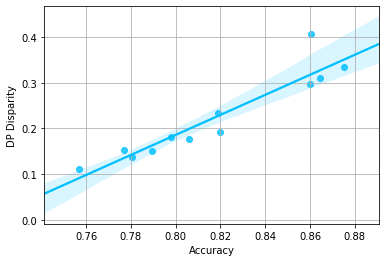

In [108]:
ax = sns.regplot(fb_df['Accuracy'], fb_df['DP Disparity'], color = 'deepskyblue')
ax.grid()
None 